In [304]:
import pandas as pd
import numpy as np
from statistics import mode
import matplotlib.pyplot as plt

In [305]:
data = pd.read_csv('cases_deaths_county_data.csv')
data = data[data['County Name'] != "Statewide Unallocated"]
data

,Unnamed: 0,countyFIPS,County Name,State,StateFIPS,"2020-01-22,cases","2020-01-23,cases","2020-01-24,cases","2020-01-25,cases","2020-01-26,cases",...,"2023-01-08,deaths","2023-01-09,deaths","2023-01-10,deaths","2023-01-11,deaths","2023-01-12,deaths","2023-01-13,deaths","2023-01-14,deaths","2023-01-15,deaths","2023-01-16,deaths",population
1,1,1001,Autauga County,AL,1,0,0,0,0,0,...,230,230,230,230,230,230,230,230,230,55869
2,2,1003,Baldwin County,AL,1,0,0,0,0,0,...,719,719,719,719,721,721,721,721,721,223234
3,3,1005,Barbour County,AL,1,0,0,0,0,0,...,103,103,103,103,103,103,103,103,103,24686
4,4,1007,Bibb County,AL,1,0,0,0,0,0,...,108,108,108,108,108,108,108,108,108,22394
5,5,1009,Blount County,AL,1,0,0,0,0,0,...,260,260,260,260,261,261,261,261,261,57826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,3188,56037,Sweetwater County,WY,56,0,0,0,0,0,...,136,136,136,136,136,136,136,136,136,42343
3189,3189,56039,Teton County,WY,56,0,0,0,0,0,...,16,16,16,16,16,16,16,16,16,23464
3190,3190,56041,Uinta County,WY,56,0,0,0,0,0,...,43,43,43,43,43,43,43,43,43,20226
3191,3191,56043,Washakie County,WY,56,0,0,0,0,0,...,47,47,47,47,47,47,47,47,47,7805


In [306]:
delete_list = []
for i in range(5, len(data.keys()) - 1):
    if int(data.keys()[i][:4]) != 2022:
        delete_list.append(i)
    elif int(data.keys()[i][5:7]) < 6:
        delete_list.append(i)

may_31_cases_index = data.keys().get_loc('2022-05-31,cases')
may_31_deaths_index = data.keys().get_loc('2022-05-31,deaths')
delete_list.remove(may_31_cases_index)
delete_list.remove(may_31_deaths_index)

new_data = data.drop(data.columns[delete_list],axis = 1)
new_data
# print(new_data.keys()[5:len(new_data.keys()) - 6])

,Unnamed: 0,countyFIPS,County Name,State,StateFIPS,"2022-05-31,cases","2022-06-01,cases","2022-06-02,cases","2022-06-03,cases","2022-06-04,cases",...,"2022-12-23,deaths","2022-12-24,deaths","2022-12-25,deaths","2022-12-26,deaths","2022-12-27,deaths","2022-12-28,deaths","2022-12-29,deaths","2022-12-30,deaths","2022-12-31,deaths",population
1,1,1001,Autauga County,AL,1,15963,15969,15978,15978,15978,...,230,230,230,230,230,230,230,230,230,55869
2,2,1003,Baldwin County,AL,1,56512,56580,56648,56648,56648,...,719,719,719,719,719,719,719,719,719,223234
3,3,1005,Barbour County,AL,1,5707,5710,5714,5714,5714,...,103,103,103,103,103,103,103,103,103,24686
4,4,1007,Bibb County,AL,1,6500,6508,6512,6512,6512,...,108,108,108,108,108,108,108,108,108,22394
5,5,1009,Blount County,AL,1,15073,15077,15084,15084,15084,...,260,260,260,260,260,260,260,260,260,57826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,3188,56037,Sweetwater County,WY,56,11178,11178,11178,11178,11178,...,136,136,136,136,136,136,136,136,136,42343
3189,3189,56039,Teton County,WY,56,10229,10229,10229,10229,10229,...,16,16,16,16,16,16,16,16,16,23464
3190,3190,56041,Uinta County,WY,56,5681,5681,5681,5681,5681,...,43,43,43,43,43,43,43,43,43,20226
3191,3191,56043,Washakie County,WY,56,2369,2369,2369,2369,2369,...,47,47,47,47,47,47,47,47,47,7805


In [307]:
#data sets of all 4 states
NY_data = new_data[new_data.State == "NY"]
GA_data = new_data[new_data.State == "GA"]
TX_data = new_data[new_data.State == "TX"]
CA_data = new_data[new_data.State == "CA"]

GA_data

,Unnamed: 0,countyFIPS,County Name,State,StateFIPS,"2022-05-31,cases","2022-06-01,cases","2022-06-02,cases","2022-06-03,cases","2022-06-04,cases",...,"2022-12-23,deaths","2022-12-24,deaths","2022-12-25,deaths","2022-12-26,deaths","2022-12-27,deaths","2022-12-28,deaths","2022-12-29,deaths","2022-12-30,deaths","2022-12-31,deaths",population
397,397,13001,Appling County,GA,13,3559,3558,3558,3560,3560,...,135,135,135,135,135,135,135,135,135,18386
398,398,13003,Atkinson County,GA,13,1620,1621,1621,1625,1625,...,54,54,54,54,54,54,54,57,57,8165
399,399,13005,Bacon County,GA,13,2669,2666,2666,2671,2671,...,81,81,81,81,81,81,81,81,81,11164
400,400,13007,Baker County,GA,13,316,316,316,316,316,...,15,15,15,15,15,15,15,15,15,3038
401,401,13009,Baldwin County,GA,13,7357,7347,7347,7388,7388,...,255,255,255,255,255,255,255,260,260,44890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,551,13313,Whitfield County,GA,13,27344,27351,27351,27396,27396,...,471,471,471,471,471,471,471,480,480,104628
552,552,13315,Wilcox County,GA,13,829,829,829,830,830,...,72,72,72,72,72,72,72,72,72,8635
553,553,13317,Wilkes County,GA,13,1128,1126,1126,1128,1128,...,55,55,55,55,55,55,55,55,55,9777
554,554,13319,Wilkinson County,GA,13,1656,1651,1651,1658,1658,...,63,63,63,63,63,63,63,64,64,8954


In [308]:
NY_daily_cases_deaths = NY_data.drop(NY_data.columns[[0, 1, 2, 3, 4, -1]], axis=1)
cases_indexes = []
deaths_indexes = []
for i in range(len(NY_daily_cases_deaths.keys())):
    if NY_daily_cases_deaths.keys()[i][-5:] == 'cases':
        cases_indexes.append(i)
    else:
        deaths_indexes.append(i)

NY_cases = NY_daily_cases_deaths.drop(NY_daily_cases_deaths.columns[deaths_indexes],axis=1).sum().tolist()
NY_deaths = NY_daily_cases_deaths.drop(NY_daily_cases_deaths.columns[cases_indexes],axis=1).sum().tolist()


In [309]:
for i in reversed(range(1, len(NY_cases))):
    diff1 = NY_cases[i] - NY_cases[i - 1]
    diff2 = NY_deaths[i] - NY_deaths[i - 1]

    if diff1 < 0:
        NY_cases[i] = 0
    else:
        NY_cases[i] = diff1
    
    if diff2 < 0:
        NY_deaths[i] = 0
    else:
        NY_deaths[i] = diff2

NY_cases.pop(0) #first value was only used to calcuate the number of new cases of the first day of june
NY_deaths.pop(0)
NY_cases[0]

5812

In [310]:
NY_weekly_cases_data = []
NY_weekly_deaths_data = []
holder = []
for i in range(len(NY_cases)):
    if((i + 1) % 7 != 0):
        holder.append(NY_cases[i])
    else:
        holder.append(NY_cases[i])
        NY_weekly_cases_data.append(holder)
        holder = []
if len(holder) != 0:
    NY_weekly_cases_data.append(holder)
    holder = []

for i in range(len(NY_deaths)):
    if((i + 1) % 7 != 0):
        holder.append(NY_deaths[i])
    else:
        holder.append(NY_deaths[i])
        NY_weekly_deaths_data.append(holder)
        holder = []
if len(holder) != 0:
    NY_weekly_deaths_data.append(holder)
    holder = []

NY_weekly_cases_data[0]

[5812, 7877, 0, 0, 16882, 4631, 7933]

In [311]:
NY_weekly_cases_means = []
NY_weekly_cases_medians = []
NY_weekly_cases_modes = []
for i in NY_weekly_cases_data:
    NY_weekly_cases_means.append(np.mean(i))
    NY_weekly_cases_medians.append(np.median(i))
    NY_weekly_cases_modes.append(mode(i))

NY_weekly_deaths_means = []
NY_weekly_deaths_medians = []
NY_weekly_deaths_modes = []
for i in NY_weekly_deaths_data:
    NY_weekly_deaths_means.append(np.mean(i))
    NY_weekly_deaths_medians.append(np.median(i))
    NY_weekly_deaths_modes.append(mode(i))

In [312]:
#generate datasets for GA
GA_daily_cases_deaths = GA_data.drop(GA_data.columns[[0, 1, 2, 3, 4, -1]], axis=1)
GA_cases = GA_daily_cases_deaths.drop(GA_daily_cases_deaths.columns[deaths_indexes],axis=1).sum().tolist()
GA_deaths = GA_daily_cases_deaths.drop(GA_daily_cases_deaths.columns[cases_indexes],axis=1).sum().tolist()

for i in reversed(range(1, len(GA_cases))):
    diff1 = GA_cases[i] - GA_cases[i - 1]
    diff2 = GA_deaths[i] - GA_deaths[i - 1]

    if diff1 < 0:
        GA_cases[i] = 0
    else:
        GA_cases[i] = diff1
    
    if diff2 < 0:
        GA_deaths[i] = 0
    else:
        GA_deaths[i] = diff2

GA_cases.pop(0)
GA_deaths.pop(0)
GA_cases[0]

GA_weekly_cases_data = []
GA_weekly_deaths_data = []
holder = []
for i in range(len(GA_cases)):
    if((i + 1) % 7 != 0):
        holder.append(GA_cases[i])
    else:
        holder.append(GA_cases[i])
        GA_weekly_cases_data.append(holder)
        holder = []
if len(holder) != 0:
    GA_weekly_cases_data.append(holder)
    holder = []

for i in range(len(GA_deaths)):
    if((i + 1) % 7 != 0):
        holder.append(GA_deaths[i])
    else:
        holder.append(GA_deaths[i])
        GA_weekly_deaths_data.append(holder)
        holder = []
if len(holder) != 0:
    GA_weekly_deaths_data.append(holder)
    holder = []


GA_weekly_cases_means = []
GA_weekly_cases_medians = []
GA_weekly_cases_modes = []
for i in GA_weekly_cases_data:
    GA_weekly_cases_means.append(np.mean(i))
    GA_weekly_cases_medians.append(np.median(i))
    GA_weekly_cases_modes.append(mode(i))

GA_weekly_deaths_means = []
GA_weekly_deaths_medians = []
GA_weekly_deaths_modes = []
for i in GA_weekly_deaths_data:
    GA_weekly_deaths_means.append(np.mean(i))
    GA_weekly_deaths_medians.append(np.median(i))
    GA_weekly_deaths_modes.append(mode(i))


In [313]:
#generate data for CA
CA_daily_cases_deaths = CA_data.drop(CA_data.columns[[0, 1, 2, 3, 4, -1]], axis=1)
CA_cases = CA_daily_cases_deaths.drop(CA_daily_cases_deaths.columns[deaths_indexes],axis=1).sum().tolist()
CA_deaths = CA_daily_cases_deaths.drop(CA_daily_cases_deaths.columns[cases_indexes],axis=1).sum().tolist()

for i in reversed(range(1, len(CA_cases))):
    diff1 = CA_cases[i] - CA_cases[i - 1]
    diff2 = CA_deaths[i] - CA_deaths[i - 1]

    if diff1 < 0:
        CA_cases[i] = 0
    else:
        CA_cases[i] = diff1
    
    if diff2 < 0:
        CA_deaths[i] = 0
    else:
        CA_deaths[i] = diff2

CA_cases.pop(0)
CA_deaths.pop(0)
CA_cases[0]

CA_weekly_cases_data = []
CA_weekly_deaths_data = []
holder = []
for i in range(len(CA_cases)):
    if((i + 1) % 7 != 0):
        holder.append(CA_cases[i])
    else:
        holder.append(CA_cases[i])
        CA_weekly_cases_data.append(holder)
        holder = []
if len(holder) != 0:
    CA_weekly_cases_data.append(holder)
    holder = []

for i in range(len(CA_deaths)):
    if((i + 1) % 7 != 0):
        holder.append(CA_deaths[i])
    else:
        holder.append(CA_deaths[i])
        CA_weekly_deaths_data.append(holder)
        holder = []
if len(holder) != 0:
    CA_weekly_deaths_data.append(holder)
    holder = []


CA_weekly_cases_means = []
CA_weekly_cases_medians = []
CA_weekly_cases_modes = []
for i in CA_weekly_cases_data:
    CA_weekly_cases_means.append(np.mean(i))
    CA_weekly_cases_medians.append(np.median(i))
    CA_weekly_cases_modes.append(mode(i))

CA_weekly_deaths_means = []
CA_weekly_deaths_medians = []
CA_weekly_deaths_modes = []
for i in CA_weekly_deaths_data:
    CA_weekly_deaths_means.append(np.mean(i))
    CA_weekly_deaths_medians.append(np.median(i))
    CA_weekly_deaths_modes.append(mode(i))

In [314]:
#generate data for TX
TX_daily_cases_deaths = TX_data.drop(TX_data.columns[[0, 1, 2, 3, 4, -1]], axis=1)
TX_cases = TX_daily_cases_deaths.drop(TX_daily_cases_deaths.columns[deaths_indexes],axis=1).sum().tolist()
TX_deaths = TX_daily_cases_deaths.drop(TX_daily_cases_deaths.columns[cases_indexes],axis=1).sum().tolist()

for i in reversed(range(1, len(TX_cases))):
    diff1 = TX_cases[i] - TX_cases[i - 1]
    diff2 = TX_deaths[i] - TX_deaths[i - 1]

    if diff1 < 0:
        TX_cases[i] = 0
    else:
        TX_cases[i] = diff1
    
    if diff2 < 0:
        TX_deaths[i] = 0
    else:
        TX_deaths[i] = diff2

TX_cases.pop(0)
TX_deaths.pop(0)
TX_cases[0]

TX_weekly_cases_data = []
TX_weekly_deaths_data = []
holder = []
for i in range(len(TX_cases)):
    if((i + 1) % 7 != 0):
        holder.append(TX_cases[i])
    else:
        holder.append(TX_cases[i])
        TX_weekly_cases_data.append(holder)
        holder = []
if len(holder) != 0:
    TX_weekly_cases_data.append(holder)
    holder = []

for i in range(len(TX_deaths)):
    if((i + 1) % 7 != 0):
        holder.append(TX_deaths[i])
    else:
        holder.append(TX_deaths[i])
        TX_weekly_deaths_data.append(holder)
        holder = []
if len(holder) != 0:
    TX_weekly_deaths_data.append(holder)
    holder = []


TX_weekly_cases_means = []
TX_weekly_cases_medians = []
TX_weekly_cases_modes = []
for i in TX_weekly_cases_data:
    TX_weekly_cases_means.append(np.mean(i))
    TX_weekly_cases_medians.append(np.median(i))
    TX_weekly_cases_modes.append(mode(i))

TX_weekly_deaths_means = []
TX_weekly_deaths_medians = []
TX_weekly_deaths_modes = []
for i in TX_weekly_deaths_data:
    TX_weekly_deaths_means.append(np.mean(i))
    TX_weekly_deaths_medians.append(np.median(i))
    TX_weekly_deaths_modes.append(mode(i))

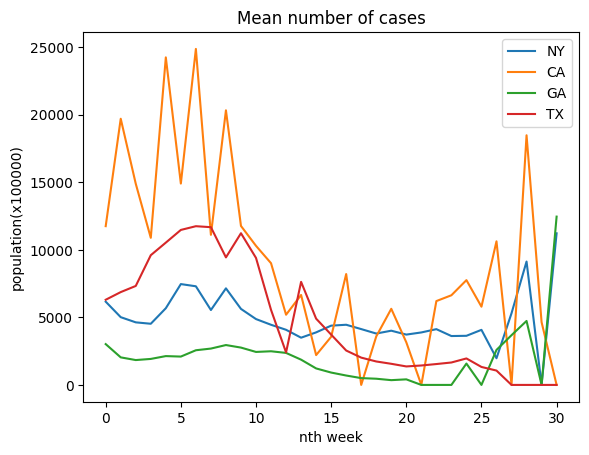

In [315]:
plt.plot(NY_weekly_cases_means, label='NY')
plt.plot(CA_weekly_cases_means, label='CA')
plt.plot(GA_weekly_cases_means, label='GA')
plt.plot(TX_weekly_cases_means, label='TX')
plt.title("Mean number of cases")
plt.legend()
plt.xlabel("nth week")
plt.ylabel("population(x100000)")
plt.show()

The states follow a similar trend for mean cases where there is a visible increase during the weeks 0 through 10. Then they all slow down and then spike up towards the end eccept for TX. 

The first rise can be explained by the summer. During the summer season, people have more interations with each other due to travelling. This gives covid more opportunities to spread through populations especially in places that have popular locations for travel.

The second spike at the end can be explained by the winter season. During colder tempuratures, people have weaker immune systems which means they are more suseptable to getting covid. 

Also, the charts are very staggered because many times there were no new cases or deaths reported on a given day. This messes with the charts later as well, especially for median and mode charts.

In general, these trends are similar to the trends of the US as a whole, especially CA. 

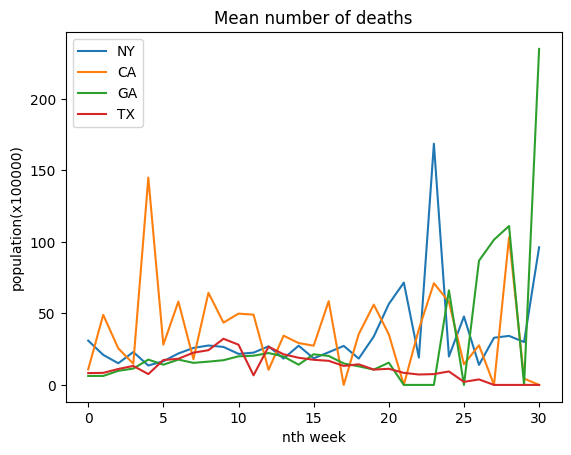

In [316]:
plt.plot(NY_weekly_deaths_means, label='NY')
plt.plot(CA_weekly_deaths_means, label='CA')
plt.plot(GA_weekly_deaths_means, label='GA')
plt.plot(TX_weekly_deaths_means, label='TX')
plt.title("Mean number of deaths")
plt.legend()
plt.xlabel("nth week")
plt.ylabel("population(x100000)")
plt.show()

For the deaths, the trends are similar to the trends of the cases because people who die form covid usually die shortly after they are first exposed to covid.

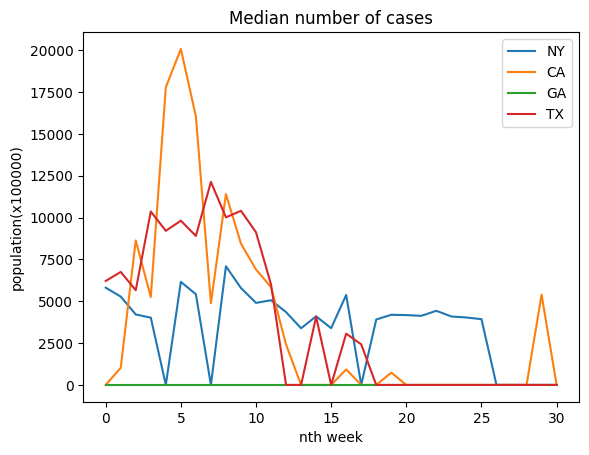

In [317]:
plt.plot(NY_weekly_cases_medians, label='NY')
plt.plot(CA_weekly_cases_medians, label='CA')
plt.plot(GA_weekly_cases_medians, label='GA')
plt.plot(TX_weekly_cases_medians, label='TX')
plt.title("Median number of cases")
plt.legend()
plt.xlabel("nth week")
plt.ylabel("population(x100000)")
plt.show()

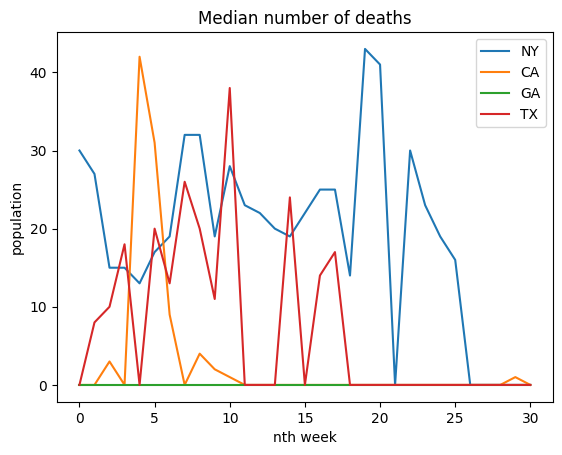

In [318]:
plt.plot(NY_weekly_deaths_medians, label='NY')
plt.plot(CA_weekly_deaths_medians, label='CA')
plt.plot(GA_weekly_deaths_medians, label='GA')
plt.plot(TX_weekly_deaths_medians, label='TX')
plt.title("Median number of deaths")
plt.legend()
plt.xlabel("nth week")
plt.ylabel("population")
plt.show()

As mentioned before, many times there were no new reports of cases or deaths which makes the charts seem really staggered.

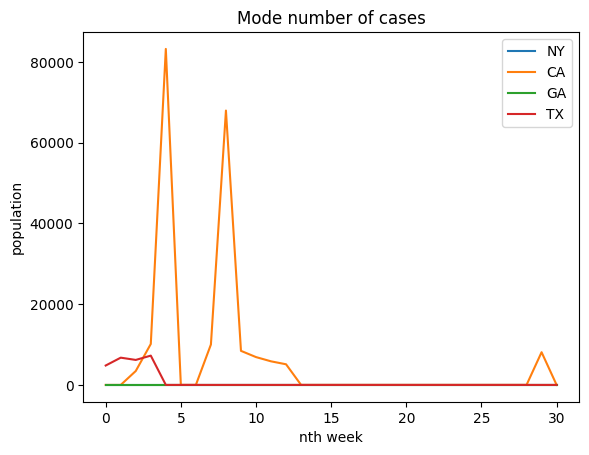

In [319]:
plt.plot(NY_weekly_cases_modes, label='NY')
plt.plot(CA_weekly_cases_modes, label='CA')
plt.plot(GA_weekly_cases_modes, label='GA')
plt.plot(TX_weekly_cases_modes, label='TX')
plt.title("Mode number of cases")
plt.legend()
plt.xlabel("nth week")
plt.ylabel("population")
plt.show()

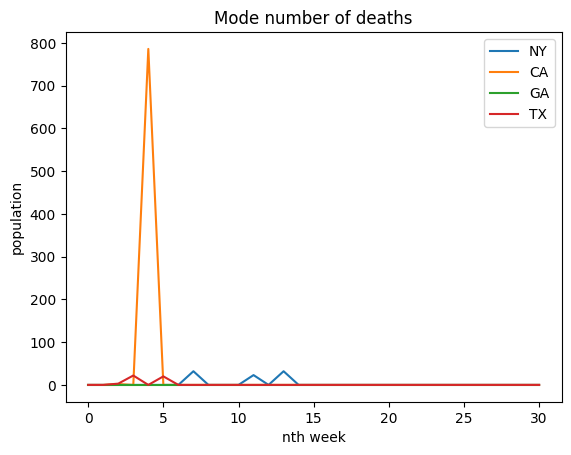

In [320]:
plt.plot(NY_weekly_deaths_modes, label='NY')
plt.plot(CA_weekly_deaths_modes, label='CA')
plt.plot(GA_weekly_deaths_modes, label='GA')
plt.plot(TX_weekly_deaths_modes, label='TX')
plt.title("Mode number of deaths")
plt.legend()
plt.xlabel("nth week")
plt.ylabel("population")
plt.show()

In [321]:
texas_counties = 48000
harris_county = 201
dallas_county = 113
tarrant_county = 439

harris_data = TX_data[TX_data.countyFIPS == texas_counties + harris_county]
dallas_data = TX_data[TX_data.countyFIPS == texas_counties + dallas_county]
tarrant_data = TX_data[TX_data.countyFIPS == texas_counties + tarrant_county]

In [322]:
harris_daily_cases_deaths = harris_data.drop(harris_data.columns[[0, 1, 2, 3, 4, -1]], axis=1)
harris_cases = harris_daily_cases_deaths.drop(harris_daily_cases_deaths.columns[deaths_indexes],axis=1).sum().tolist()
harris_deaths = harris_daily_cases_deaths.drop(harris_daily_cases_deaths.columns[cases_indexes],axis=1).sum().tolist()

dallas_daily_cases_deaths = dallas_data.drop(dallas_data.columns[[0, 1, 2, 3, 4, -1]], axis=1)
dallas_cases = dallas_daily_cases_deaths.drop(dallas_daily_cases_deaths.columns[deaths_indexes],axis=1).sum().tolist()
dallas_deaths = dallas_daily_cases_deaths.drop(dallas_daily_cases_deaths.columns[cases_indexes],axis=1).sum().tolist()

tarrant_daily_cases_deaths = tarrant_data.drop(tarrant_data.columns[[0, 1, 2, 3, 4, -1]], axis=1)
tarrant_cases = tarrant_daily_cases_deaths.drop(tarrant_daily_cases_deaths.columns[deaths_indexes],axis=1).sum().tolist()
tarrant_deaths = tarrant_daily_cases_deaths.drop(tarrant_daily_cases_deaths.columns[cases_indexes],axis=1).sum().tolist()

I was not sure what the instructions meant by plotting weekly trends for the county data so I found the weekly mean, median, and mode for all the counties. This process is the same what I did for each state.

In [323]:
#generate data for harris county
for i in reversed(range(1, len(harris_cases))):
    diff1 = harris_cases[i] - harris_cases[i - 1]
    diff2 = harris_deaths[i] - harris_deaths[i - 1]

    if diff1 < 0:
        harris_cases[i] = 0
    else:
        harris_cases[i] = diff1
    
    if diff2 < 0:
        harris_deaths[i] = 0
    else:
        harris_deaths[i] = diff2

harris_cases.pop(0)
harris_deaths.pop(0)
harris_cases[0]

harris_weekly_cases_data = []
harris_weekly_deaths_data = []
holder = []
for i in range(len(harris_cases)):
    if((i + 1) % 7 != 0):
        holder.append(harris_cases[i])
    else:
        holder.append(harris_cases[i])
        harris_weekly_cases_data.append(holder)
        holder = []
if len(holder) != 0:
    harris_weekly_cases_data.append(holder)
    holder = []

for i in range(len(harris_deaths)):
    if((i + 1) % 7 != 0):
        holder.append(harris_deaths[i])
    else:
        holder.append(harris_deaths[i])
        harris_weekly_deaths_data.append(holder)
        holder = []
if len(holder) != 0:
    harris_weekly_deaths_data.append(holder)
    holder = []


harris_weekly_cases_means = []
harris_weekly_cases_medians = []
harris_weekly_cases_modes = []
for i in harris_weekly_cases_data:
    harris_weekly_cases_means.append(np.mean(i))
    harris_weekly_cases_medians.append(np.median(i))
    harris_weekly_cases_modes.append(mode(i))

harris_weekly_deaths_means = []
harris_weekly_deaths_medians = []
harris_weekly_deaths_modes = []
for i in harris_weekly_deaths_data:
    harris_weekly_deaths_means.append(np.mean(i))
    harris_weekly_deaths_medians.append(np.median(i))
    harris_weekly_deaths_modes.append(mode(i))

In [324]:
#generate datasets for dallas
for i in reversed(range(1, len(dallas_cases))):
    diff1 = dallas_cases[i] - dallas_cases[i - 1]
    diff2 = dallas_deaths[i] - dallas_deaths[i - 1]

    if diff1 < 0:
        dallas_cases[i] = 0
    else:
        dallas_cases[i] = diff1
    
    if diff2 < 0:
        dallas_deaths[i] = 0
    else:
        dallas_deaths[i] = diff2

dallas_cases.pop(0)
dallas_deaths.pop(0)
dallas_cases[0]

dallas_weekly_cases_data = []
dallas_weekly_deaths_data = []
holder = []
for i in range(len(dallas_cases)):
    if((i + 1) % 7 != 0):
        holder.append(dallas_cases[i])
    else:
        holder.append(dallas_cases[i])
        dallas_weekly_cases_data.append(holder)
        holder = []
if len(holder) != 0:
    dallas_weekly_cases_data.append(holder)
    holder = []

for i in range(len(dallas_deaths)):
    if((i + 1) % 7 != 0):
        holder.append(dallas_deaths[i])
    else:
        holder.append(dallas_deaths[i])
        dallas_weekly_deaths_data.append(holder)
        holder = []
if len(holder) != 0:
    dallas_weekly_deaths_data.append(holder)
    holder = []


dallas_weekly_cases_means = []
dallas_weekly_cases_medians = []
dallas_weekly_cases_modes = []
for i in dallas_weekly_cases_data:
    dallas_weekly_cases_means.append(np.mean(i))
    dallas_weekly_cases_medians.append(np.median(i))
    dallas_weekly_cases_modes.append(mode(i))

dallas_weekly_deaths_means = []
dallas_weekly_deaths_medians = []
dallas_weekly_deaths_modes = []
for i in dallas_weekly_deaths_data:
    dallas_weekly_deaths_means.append(np.mean(i))
    dallas_weekly_deaths_medians.append(np.median(i))
    dallas_weekly_deaths_modes.append(mode(i))

In [325]:
#generate datasets for tarrant
for i in reversed(range(1, len(tarrant_cases))):
    diff1 = tarrant_cases[i] - tarrant_cases[i - 1]
    diff2 = tarrant_deaths[i] - tarrant_deaths[i - 1]

    if diff1 < 0:
        tarrant_cases[i] = 0
    else:
        tarrant_cases[i] = diff1
    
    if diff2 < 0:
        tarrant_deaths[i] = 0
    else:
        tarrant_deaths[i] = diff2

tarrant_cases.pop(0)
tarrant_deaths.pop(0)
tarrant_cases[0]

tarrant_weekly_cases_data = []
tarrant_weekly_deaths_data = []
holder = []
for i in range(len(tarrant_cases)):
    if((i + 1) % 7 != 0):
        holder.append(tarrant_cases[i])
    else:
        holder.append(tarrant_cases[i])
        tarrant_weekly_cases_data.append(holder)
        holder = []
if len(holder) != 0:
    tarrant_weekly_cases_data.append(holder)
    holder = []

for i in range(len(tarrant_deaths)):
    if((i + 1) % 7 != 0):
        holder.append(tarrant_deaths[i])
    else:
        holder.append(tarrant_deaths[i])
        tarrant_weekly_deaths_data.append(holder)
        holder = []
if len(holder) != 0:
    tarrant_weekly_deaths_data.append(holder)
    holder = []


tarrant_weekly_cases_means = []
tarrant_weekly_cases_medians = []
tarrant_weekly_cases_modes = []
for i in tarrant_weekly_cases_data:
    tarrant_weekly_cases_means.append(np.mean(i))
    tarrant_weekly_cases_medians.append(np.median(i))
    tarrant_weekly_cases_modes.append(mode(i))

tarrant_weekly_deaths_means = []
tarrant_weekly_deaths_medians = []
tarrant_weekly_deaths_modes = []
for i in tarrant_weekly_deaths_data:
    tarrant_weekly_deaths_means.append(np.mean(i))
    tarrant_weekly_deaths_medians.append(np.median(i))
    tarrant_weekly_deaths_modes.append(mode(i))

First, I will show the raw data for cases and deaths for all three counties.

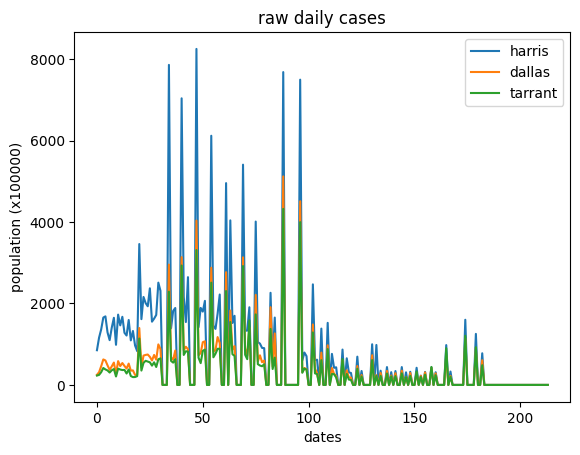

In [326]:
plt.plot(harris_cases, label='harris')
plt.plot(dallas_cases, label='dallas')
plt.plot(tarrant_cases, label='tarrant')
plt.title('raw daily cases')
plt.xlabel("dates")
plt.ylabel("population (x100000)")
plt.legend()

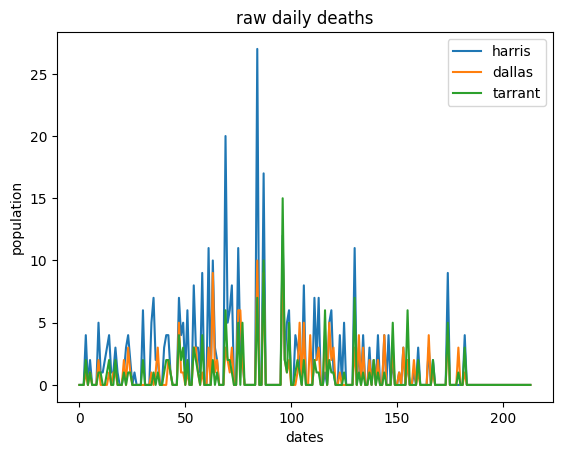

In [327]:
plt.plot(harris_deaths, label='harris')
plt.plot(dallas_deaths, label='dallas')
plt.plot(tarrant_deaths, label='tarrant')
plt.title('raw daily deaths')
plt.xlabel("dates")
plt.ylabel("population")
plt.legend()

The raw data for cases and deaths for all three of the counties follow the same trends to each other. The trend of the cases are also similar to the cases of the states and the country.

Now, I show the log normalized values for the raw data. They graph looks exactly like the raw data without the log normalizing step except that the values have much less variation.

/var/folders/8j/6h6l7gnd305gvk0v21rv54gm0000gn/T/ipykernel_49288/564336813.py:1: RuntimeWarning: divide by zero encountered in log
  log_harris_cases = np.log(harris_cases)
/var/folders/8j/6h6l7gnd305gvk0v21rv54gm0000gn/T/ipykernel_49288/564336813.py:2: RuntimeWarning: divide by zero encountered in log
  log_dallas_cases = np.log(dallas_cases)
/var/folders/8j/6h6l7gnd305gvk0v21rv54gm0000gn/T/ipykernel_49288/564336813.py:3: RuntimeWarning: divide by zero encountered in log
  log_tarrant_cases = np.log(tarrant_cases)


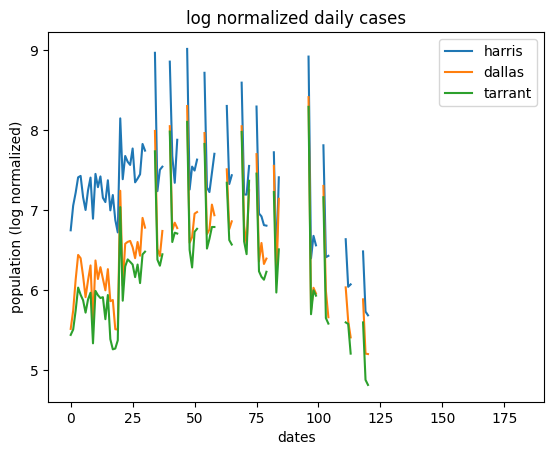

In [328]:
log_harris_cases = np.log(harris_cases)
log_dallas_cases = np.log(dallas_cases)
log_tarrant_cases = np.log(tarrant_cases)

plt.plot(log_harris_cases, label='harris')
plt.plot(log_dallas_cases, label='dallas')
plt.plot(log_tarrant_cases, label='tarrant')
plt.title('log normalized daily cases')
plt.xlabel("dates")
plt.ylabel("population (log normalized)")
plt.legend()

The log normalized charts show the more important trend of the data by removing the data from the days that did not have anything new. This more clearly shows the slight swell around august and september which was what we saw for the states.

/var/folders/8j/6h6l7gnd305gvk0v21rv54gm0000gn/T/ipykernel_49288/3856634312.py:1: RuntimeWarning: divide by zero encountered in log
  log_harris_deaths = np.log(harris_deaths)
/var/folders/8j/6h6l7gnd305gvk0v21rv54gm0000gn/T/ipykernel_49288/3856634312.py:2: RuntimeWarning: divide by zero encountered in log
  log_dallas_deaths = np.log(dallas_deaths)
/var/folders/8j/6h6l7gnd305gvk0v21rv54gm0000gn/T/ipykernel_49288/3856634312.py:3: RuntimeWarning: divide by zero encountered in log
  log_tarrant_deaths = np.log(tarrant_deaths)


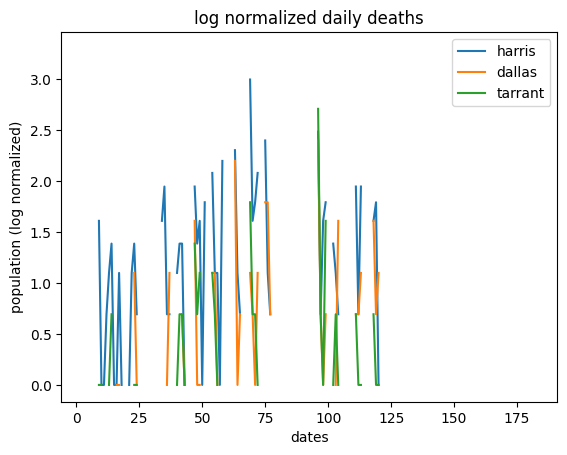

In [329]:
log_harris_deaths = np.log(harris_deaths)
log_dallas_deaths = np.log(dallas_deaths)
log_tarrant_deaths = np.log(tarrant_deaths)

plt.plot(log_harris_deaths, label='harris')
plt.plot(log_dallas_deaths, label='dallas')
plt.plot(log_tarrant_deaths, label='tarrant')
plt.title('log normalized daily deaths')
plt.xlabel("dates")
plt.ylabel("population (log normalized)")
plt.legend()

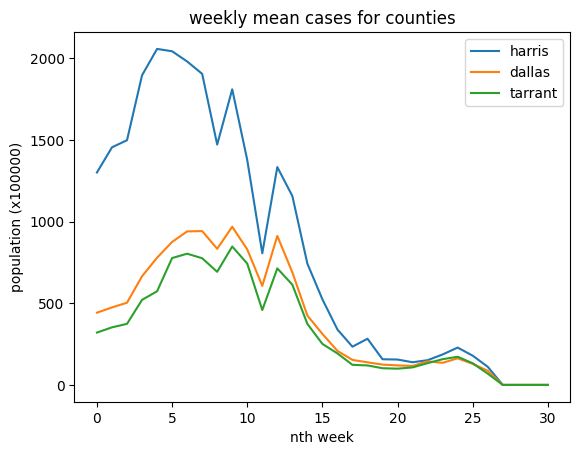

In [330]:
plt.plot(harris_weekly_cases_means, label='harris')
plt.plot(dallas_weekly_cases_means, label='dallas')
plt.plot(tarrant_weekly_cases_means, label='tarrant')
plt.title('weekly mean cases for counties')
plt.xlabel("nth week")
plt.ylabel("population (x100000)")
plt.legend()

The mean data shows much more smoother trends and clear spiked. These graphs look very similar to the trend of the US.

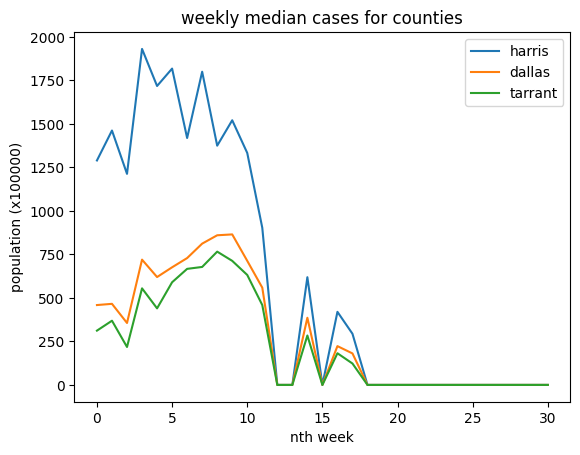

In [331]:
plt.plot(harris_weekly_cases_medians, label='harris')
plt.plot(dallas_weekly_cases_medians, label='dallas')
plt.plot(tarrant_weekly_cases_medians, label='tarrant')
plt.title('weekly median cases for counties')
plt.xlabel("nth week")
plt.ylabel("population (x100000)")
plt.legend()

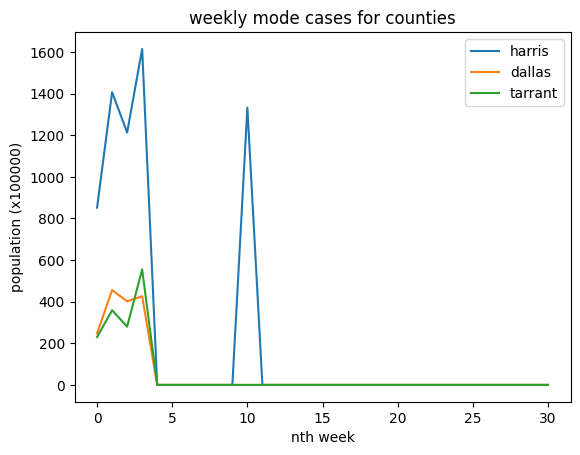

In [332]:
plt.plot(harris_weekly_cases_modes, label='harris')
plt.plot(dallas_weekly_cases_modes, label='dallas')
plt.plot(tarrant_weekly_cases_modes, label='tarrant')
plt.title('weekly mode cases for counties')
plt.xlabel("nth week")
plt.ylabel("population (x100000)")
plt.legend()

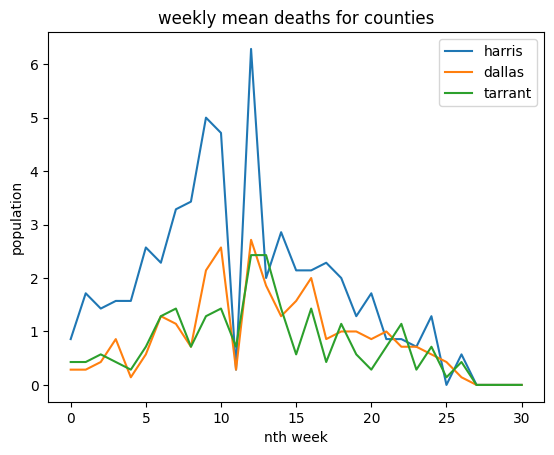

In [333]:
plt.plot(harris_weekly_deaths_means, label='harris')
plt.plot(dallas_weekly_deaths_means, label='dallas')
plt.plot(tarrant_weekly_deaths_means, label='tarrant')
plt.title('weekly mean deaths for counties')
plt.xlabel("nth week")
plt.ylabel("population")
plt.legend()

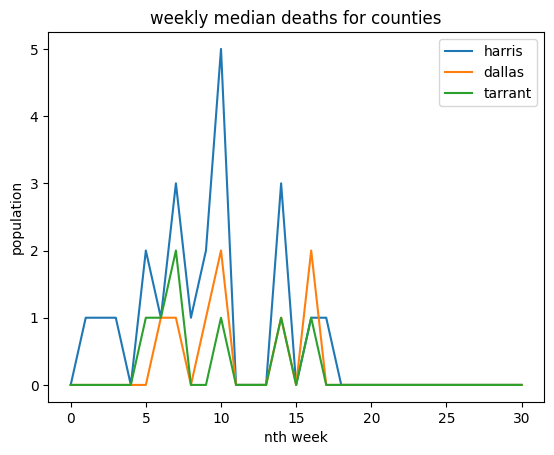

In [334]:
plt.plot(harris_weekly_deaths_medians, label='harris')
plt.plot(dallas_weekly_deaths_medians, label='dallas')
plt.plot(tarrant_weekly_deaths_medians, label='tarrant')
plt.title('weekly median deaths for counties')
plt.xlabel("nth week")
plt.ylabel("population")
plt.legend()

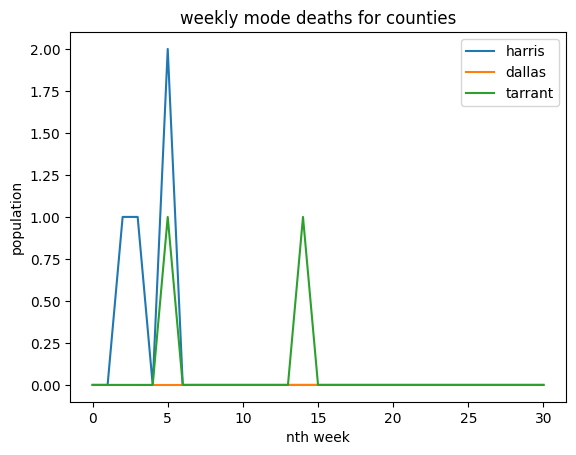

In [335]:
plt.plot(harris_weekly_deaths_modes, label='harris')
plt.plot(dallas_weekly_deaths_modes, label='dallas')
plt.plot(tarrant_weekly_deaths_modes, label='tarrant')
plt.title('weekly mode deaths for counties')
plt.xlabel("nth week")
plt.ylabel("population")
plt.legend()